# Klassificering av datapunkter med olika linjer

I denna rapport undersöker vi hur datapunkterna från `unlabelled_data.csv` klassificeras med hjälp av olika linjer. Vi börjar med vår egen linje som delar punkterna så jämnt som möjlight och jämför sedan med tre givna funktioner: 

- f(x) = −0.489x  
- g(x) = −2x + 0.16  
- h(x) = 800x − 120  

Syftet är att se om klassificeringen av punkterna skiljer sig mellan linjerna.

## Visualisering av datapunkterna med alla linjer

Vi börjar med att plotta punkterna tillsammans med vår egen linje samt de tre nya funktionerna. Detta gör det lättare att visuellt se vilka punkter som klassificeras olika beroende på linje.


(-4.811921164735585, 5.14238206483739)

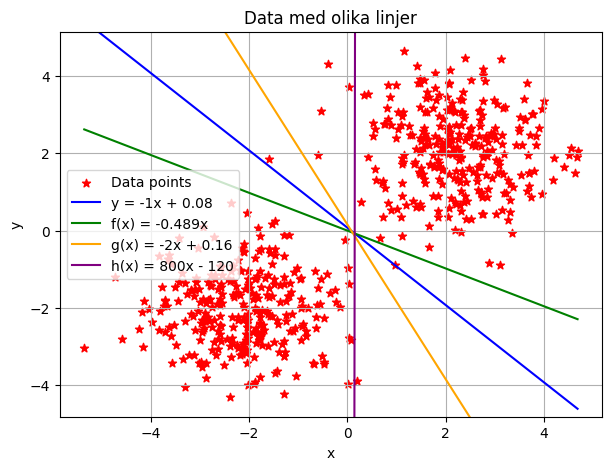

In [2]:
"""
VG uppgift:
i) Visa datan i en graf tillsammans med följande linjer utöver den vi själve hittat:

"""

import numpy as np
import matplotlib.pyplot as plt
import main as ma

# Hämta data och egen linje from main.py
x_values, y_values, my_label = ma.classify_points_and_get_labels()
k = ma.k
m= ma.m  

# Skapa x-intervallet för linjerna
x_line = np.linspace(min(x_values), max(x_values), 200)
# egen linje som delar punkterna så jämnt som möjlight
y_line = k * x_line + m

# VG-linjer
y_line1 = -0.489 * x_line      # f(x)
y_line2 = -2 * x_line + 0.16   # g(x)
y_line3 = 800 * x_line - 120   # h(x)

# === Plot ===
x_min, x_max = min(x_values) - 0.5, max(x_values) + 0.5 
y_min, y_max = min(y_values) - 0.5, max(y_values) + 0.5
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, label="Data points", color="red", marker="*")
plt.plot(x_line, y_line, label=f"y = {k}x + {m:.2f}", color="blue")
plt.plot(x_line, y_line1, label="f(x) = -0.489x", color="green")
plt.plot(x_line, y_line2, label="g(x) = -2x + 0.16", color="orange")
plt.plot(x_line, y_line3, label="h(x) = 800x - 120", color="purple")
plt.title("Data med olika linjer")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

## Klassificering av punkter

Nu klassificerar vi varje punkt med hjälp av `point_position` för alla **fyra linjer**.vår egen linje och de tre nya linjerna f(x), g(x), h(x).
För varje linje klassificerar vi datapunkterna och visar dem i en egen graf. Detta gör det möjligt att **resonera kring hur linjerna delar upp punkterna** och använda resultatet för att identifiera eventuella skillnader.

Linjens lutning bestämmer dess riktning. När lutningen är positiv stiger linjen åt höger, och när den är negativ sjunker den. Därför kan definitionen av vilken sida som räknas som “över” eller “under” linjen förändras, vilket gör att etiketterna ibland behöver inverteras.

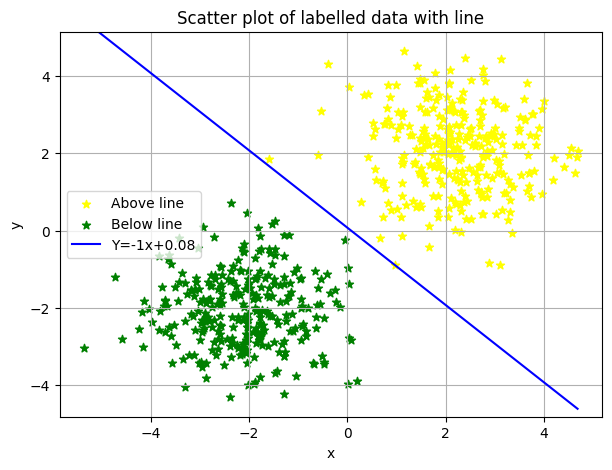

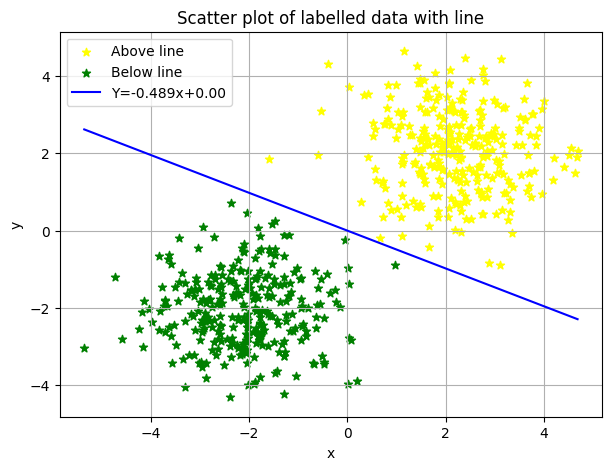

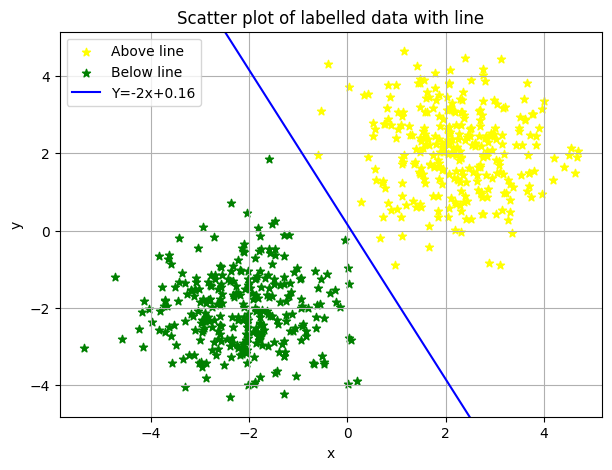

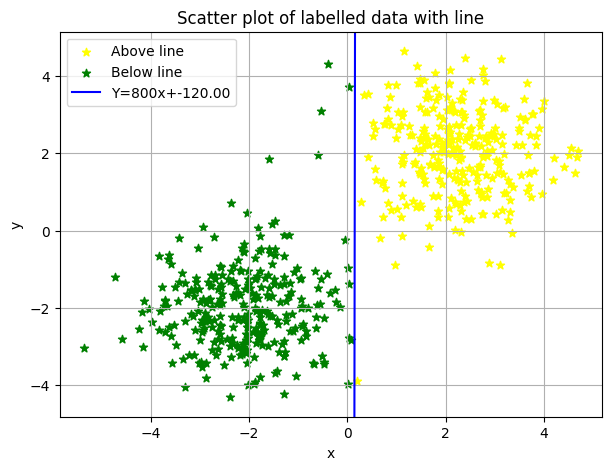

In [ ]:
"""iii) Använda dessa nya funktioner
 för att klassifiera datan
"""

#==== egen linje====
ma.draw_classified(x_line,y_line, k, m , x_values, y_values, my_label)

# ===== f(x) =====
k_f, m_f = -0.489, 0
labels_f = np.array([ma.point_position(x, y, k_f, m_f) for x, y in zip(x_values, y_values)])
y_line1 = k_f * x_line + m_f
ma.draw_classified(x_line, y_line1, k_f, m_f, x_values, y_values, labels_f)

# ===== g(x) =====
k_g, m_g = -2, 0.16
labels_g = np.array([ma.point_position(x, y, k_g, m_g) for x, y in zip(x_values, y_values)])
y_line2 = k_g * x_line + m_g
ma.draw_classified(x_line, y_line2, k_g, m_g, x_values, y_values, labels_g)

# ===== h(x)=====
k_h, m_h = 800,-120
labels_h = np.array([ma.point_position(x, y, k_h, m_h) for x, y in zip(x_values, y_values)])
#Etiketterna inverteras
labels_h= 1- labels_h # eftersom linjens lutning påverkar vilken sida som betraktas som positiv.
y_line3= k_h * x_line + m_h
ma.draw_classified(x_line, y_line3, k_h, m_h, x_values, y_values, labels_h)





## Reflektion

Utifrån grafen kan vi observera att vissa punkter klassificeras olika beroende på vilken linje vi använder.Detta visar tydligt hur valet av linje påverkar klassificeringen av datapunkterna.

- Vår linje, **f(x) = −0.489x** och **g(x) = −2x + 0.16** delar datapunkterna relativt jämnt mellan ovanför och under linjen. De ger alltså en balans i klassificeringen
- **h(x) = 800x − 120** har en extrem lutning, nästan vertikal, vilket gör att flesta punkter hamnar under linjen, och klassificeringen blir därför väldigt obalanserad.  

Det finns alltså ingen enda **rätt** linje, utan flera olika linjer kan separera punkterna på acceptabla sätt. Små förändringar i lutning **(k)** eller intercept **(m)** kan ge snarlika resultat. I praktiken innebär det att det finns **oändligt** många möjliga linjer som kan klassificera punkterna, men vissa – som vår egen linje och f(x) – passar datan betydligt bättre än andra